DSC-037 step 3: Assessment & Verfication 
---
DSC-037: Cable reflection systematics for EoR science

### Authors:
SHAO EoR Group and Teal Team

### Documentation on confluence:

Summary: This notebook is a first implementation of DSC-037 to compute and plot rudimentary (FFT, absolute value, then square) delay power spectra.

DSC description page: https://confluence.skatelescope.org/x/0rs6F
Chronological walkthrough: https://confluence.skatelescope.org/x/osw6F
Implementation: https://confluence.skatelescope.org/x/n8LMF
GitHub repo: https://github.com/uksrc-developers/dsc-037-eor


Ticket: TEAL-1128 https://jira.skatelescope.org/browse/TEAL-1128

**Dependencies:** `casacore-tools`, `python-casacore`, `pyuvdata`, `numpy`, `matplotlib`, `astropy`

Last updated: 2025-10-21

## Plot Delay Spectra

This notebook calculates and plots the Delay Spectra for a chosen baseline and polarization from a Measurement Set (MS) or UVFITS file.
The input UV fits data file hyp_1184702048_ionosub_ssins_30l_src8k_300it_8s_80kHz_i1000.uvfits used in this code 
was provided by Hyperdrive, courtesy of Dev Null.

It produces **3 figures** containing:
1.  **Raw FFT:** `log(|FFT|)` and `Phase ∠FFT` (two subplots)
2.  **Amplitude:** `|FFT|`
3.  **Power:** `|FFT|^2`

## Data Pipeline

For each time sample:
1.  $V(t, f)$  --RAW FFT over frequency ($f$)-->  $\tilde{V}(t, \tau)$
2.  Amplitude: $\mathrm{AMP}(t, \tau) = |\tilde{V}(t, \tau)|$
3.  Power: $\mathrm{POWER}(t, \tau) = |\tilde{V}(t, \tau)|^2$
4.  Phase: $\mathrm{PHASE}(t, \tau) = \angle \tilde{V}(t, \tau)$

**Plot Axes:**
* **X-axis:** Time [s] (relative to first sample)
* **Y-axis:** Delay [µs]

## Notes

* Uses a **RAW FFT** (no taper/window function).
* Flagged channels are **zeroed** (unless `ignore_flags` is `True`).
* Supports `casacore.tables` (for MS) and `pyuvdata` (for UVFITS).
* Includes smart polarization fallback for UVFITS (e.g., maps `XX` to `nn` or `xx`).

Loading UVFITS: hyp_1184702048_ionosub_ssins_30l_src8k_300it_8s_80kHz_i1000.uvfits
[INFO] Requested polarization 'XY' not found, using fallback 'ne'
[INFO] Using polarization 'NE' as fallback for requested 'XY'

[SUMMARY]
  Input file     : hyp_1184702048_ionosub_ssins_30l_src8k_300it_8s_80kHz_i1000.uvfits
  Data type      : UVFITS
  Baseline       : 2-6
  Polarization   : NE
  Time binning   : 1
  Channel binning: 1

[DELAY SPECTRUM STATISTICS]
  |FFT| Max      = 3.709e+03
  |FFT| Mean     = 5.406e+02
  |FFT| Median   = 4.883e+02
  Σ|FFT|²        = 2.153e+09
  Peak delay (µs)= 0.000



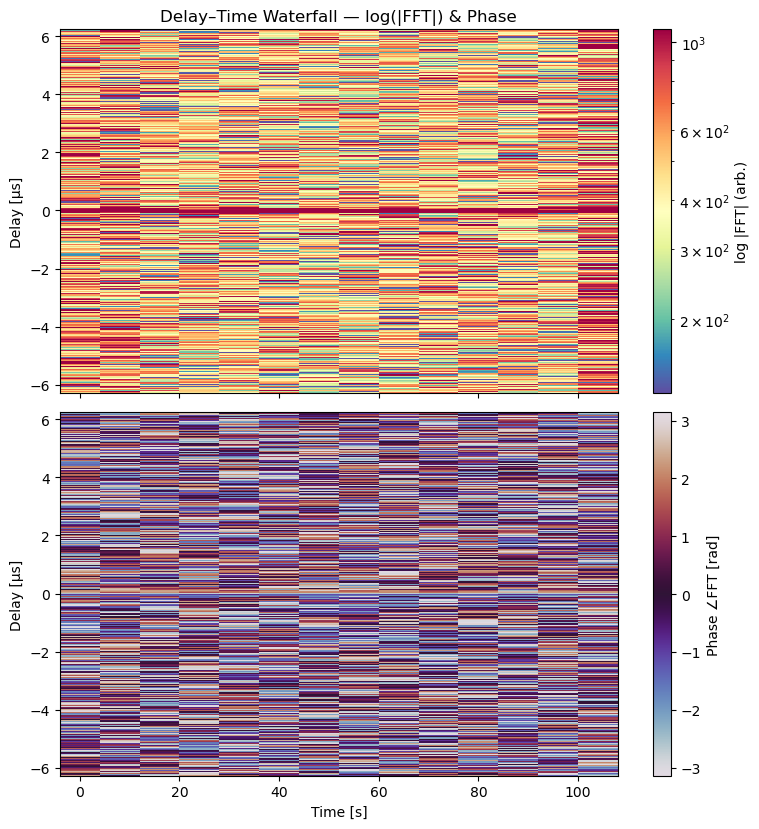

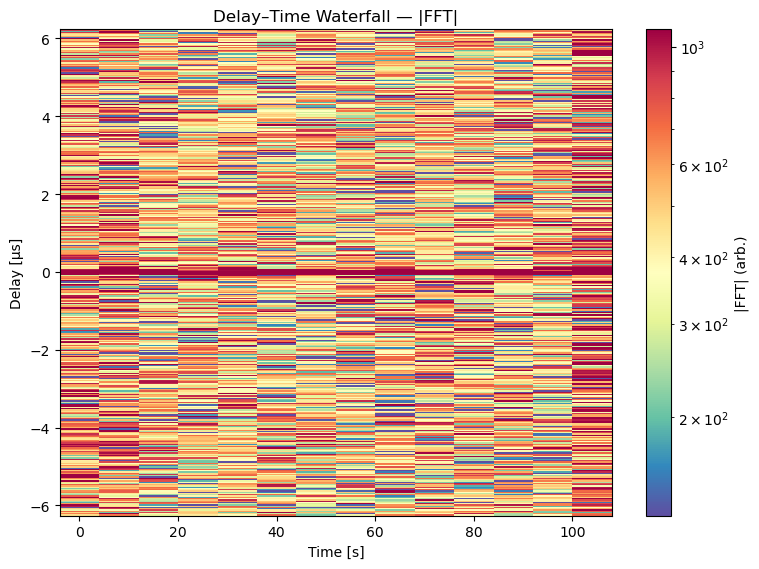

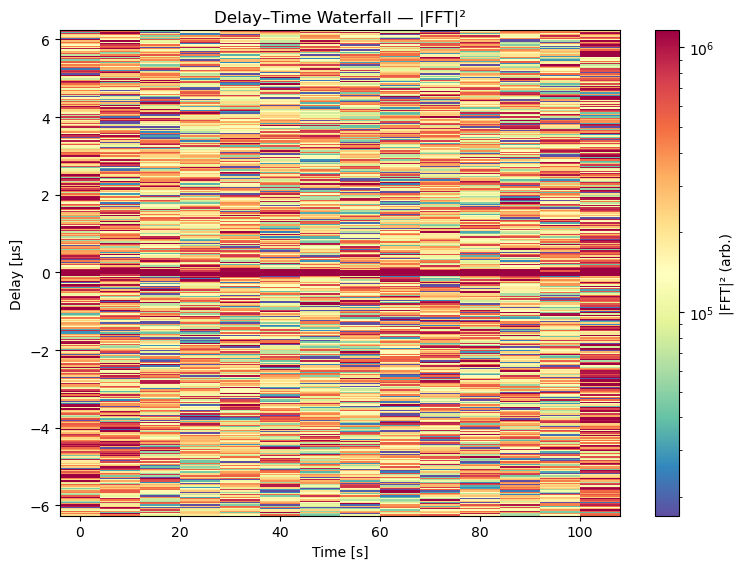

[INFO] Displayed 3 plots interactively. Close the windows to continue.


In [1]:
from plot_delay_spectra import execute_delay_time_waterfall
# --- Execute using config.yaml and notebook parameters ---

# Common parameters from config.yaml: input_file, ant1, ant2, corr, col, timebin, chanbin, format
# INPUT_FILE is set above (from config.yaml if provided, otherwise default)

# Other parameters: DDID, LIST_BASELINES, IGNORE_FLAGS, VMIN, VMAX,
#  NO_LOG, PLOT_TITLE_BASE, OUT_FILE, SHOW


execute_delay_time_waterfall("config.yaml")
